In [28]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Assignment - $k$-Nearest Neighbor Classification
 
k-Nearest Neighbor Classifier (abbreviated as k-NN) is a supervised learning algorithm for training classifiers. It is used to classify patterns, image processing, handwritten character recognition, text classification and many other applications. It is straightforward.

**Input:** A set $M$ of labeled observations (vectors), input vector $v$ that we would like to classify, and a positive integer $k$.

**Task:** Classify the vector $v$.

**Algorithm:** In the set $M$, find a subset $N$ of $k$ observations that are closest to $v$ out of all elements of $M$. These vectors are called *neighbors*. The pattern $v$ will be classified by the label which is assigned to the most vectors in $N$.

## Classification of patterns using 5-NN

The picture below shows the result of a classification of points in a plane using algorithm 5-NN. Three patterns (vectors) from the five closest patterns are classified as blue. Therefore, the pattern will also be classified as blue.

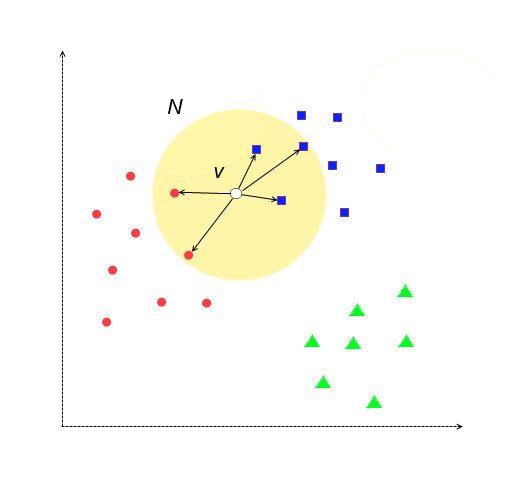!

## Implementing kNN-Algorithm

**Task 1:**  Implement kNN-algorithm as the following function:

In [29]:
from scipy.spatial import distance
import scipy.stats as st

def kNN(X, P, C, k, metric='euclidean'):
    # As a first thing, we need to compute the pairwise distance between the elements in X and in P.
    # The output matrix will be such that on the rows we have the elements of X and on the columns the elements of P.
    distance_matrix = distance.cdist(X,P, metric=metric)

    # For every row (thus, for every pattern that we want to classify in X), we will get the inidices of the k elements in P such that the distance of x € X from p € P is minimized.
    ind = np.argsort(distance_matrix, axis=1)[:,:k]

    # Now for every element x € X we want to obtain the classes of the closest elements in P
    predictions = C[ind]

    # For each label x € X, the label to assign to x will be the mode of each row (the most frequent label in the row)
    labels = st.mode(predictions, axis = 1)[0].squeeze()
    return labels

where
* `X` $\in \mathrm{R}^{n \times d}$ is a matrix containing vectors we would like to classify; each row of the matrix is a $d$-dimensional vector we need to classify,
* `P` $\in \mathrm{R}^{m \times d}$ is a matrix containing $m$ $d$-dimensional vectors (as rows) with a known classification, 
* `C` is a vector of length $m$ containing classification for all vectors in `P`, where `C[i]` is an integer code of the class of the vector `P[i]`
* `k` is the value of the parameter $k$ of $k$-NN algorithm,
* `metric` is the metric used to compute the distance between vectors; at least `euclidean` and `cityblock` should be possible for the Euclidean and Manhattan metrics, respectively.

The function should return vector `R` of length $n$ with classification for all patterns in `X` computed according to k-NN algorithm, where the distance between a pair of patterns is calculated using Euclidean distance. **Your implementation must not use any library function for computing kNN classification!** You can use, however, any function from the `numpy` and `scipy` library. E.g., for computing pairwise distances between vectors in two arrays `XA` and `XB`, you can use the function `cdist(XA, XB`*[, metric]*`)` from the module `scipy.spacial.distance`.

In [30]:
from scipy.spatial.distance import cdist

x = np.array([[0,0],[3,2]])
y = np.array([[1,1],[2,2],[3,3],[4,4],[2,3]])
print(cdist(x,y,metric='euclidean'))
# manhattan distance. It computes the distance along 2 various dimensions separately
print(cdist(x,y,metric='cityblock'))

#With this configuration we expect (1,2)
kNN(x,y,np.array([1,2,2,1,1]),3)

[[1.41421356 2.82842712 4.24264069 5.65685425 3.60555128]
 [2.23606798 1.         1.         2.23606798 1.41421356]]
[[2. 4. 6. 8. 5.]
 [3. 1. 1. 3. 2.]]


array([1, 2])

Some other useful functions are `numpy.argsort` or `scipy.mode`. You need not use any advanced data structures or algorithms, as the function will be used on small sample sets only.

## Visualization of a Classification on a Plane

In the following tasks, we will visualize the k-NN algorithm results so that the class will be interpreted as a color using the colormap `plasma`. You can see a usage of colormap `plasma` in the following example.

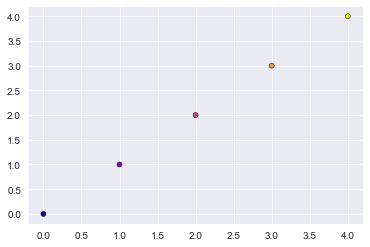

In [31]:
import matplotlib.cm as cm

plt.scatter(range(5), range(5), c=range(5), edgecolor='k', s=25, linewidth=0.5, cmap = cm.plasma)

Let `M` contain three two-dimensional patterns with classifications 0,1,2.

In [32]:
M = np.array([[-1, 0], [1, 1], [2, -1]])
C = np.arange(3)

**Task 2:** Using your function `kNN()`, implement the following function

In [33]:
def test_kNN(minx,maxx,miny,maxy,M,C,k,n,metric='euclidean',figsize=(4,4)):
    # Evaluate the coordinate (x,y) of the points you need to classify
    Xpts = np.arange(minx, maxx, ((maxx - minx) / n))
    Ypts = np.arange(miny, maxy, ((maxy - miny) / n))
    # Building a matrix (200,200) for the x's and for the y's
    X2D,Y2D = np.meshgrid(Xpts, Ypts)

    # Concatenating X's and Y's together
    coordinates = np.column_stack((X2D.ravel(), Y2D.ravel()))
    # To check the result uncomment the following line:
    # print(coordinates)

    # Now we simply compute the kNN by using the function we defined above, the data are already
    # in their correct form
    labels_flattened = kNN(coordinates, M, C, k, metric)

    # reshape the labels to a matrix n x n
    labels = labels_flattened.reshape(n,n)

    plt.figure(figsize=figsize)
    # Plotting the values of the matrix M
    plt.scatter(M[:,0], M[:,1], cmap=cm.plasma, c=C, alpha=1, s=10, marker='o', linewidths=3, vmin=0, vmax=np.max(C))
    # We set origin = lower since the first coordinate in the array is (-minx, -miny)
    plt.imshow(labels, cmap=cm.plasma, vmin=0, vmax=np.max(C), extent=(minx, maxx, miny, maxy), origin='lower', alpha=0.7, aspect='auto')

    # Predicting the labels for the points in the matrix M
    labels_M = kNN(M,M,C,k,metric)

    # Getting a boolean array in which I have 1 if the label predicted and the true one are different
    wrong = np.array(labels_M != C)
    # sum over the wrong predictions
    num_wrong = np.sum(wrong)
    return num_wrong

# n for example is (200 pixels in rows x 200 pixels in columns).
# For each pixel you should compute classification according to k-NN and plot the corresponding value according to the color needed

The function should plot an image similar to the above picture. The parameters of the function are:
* `minx` is the lower limit of the first coordinate,
* `maxx` is the upper limit of the first coordinate,
* `miny` is the lower limit of the second coordinate,
* `maxy` is the upper limit of the second coordinate,
* `M` is a matrix containing two-dimensional vectors,
* `C` is a vector of integers; `C[i]` is the classification the `i`-th row of `M`,
* `K` is the parameter $k$ of the $k$-NN algorithm,
* `n` is the number of "pixels" in each row and each column of the resulting image,
* `metric` is the metric used for computing the distance between vectors, and
* `figsize` is a pair of horizontal and vertical dimensions of the produced plot.
The function plots an image containing the points from `M`; points from the same class should be marked with the same color, different classes should be marked with different colors. You **cannot assume** that all points in `M` belong to the interval (`minx`;`maxx`)$\times$(`miny`;`maxy`). All other points of the interval should be painted in the color corresponding to the class to which they are classified using the $k$-NN algorithm with $k=$ `K`. The resolution of the image should be `n` $\times$`n` points. 

Besides plotting the image, the the function should return the number of vectors from `M` classified by the k-NN classifier differently from their class in `C`.

We can cover the two-dimensional interval $\langle -3,4 \rangle \times \langle -3,3 \rangle$ with a mesh of points for which we will compute their classification using $1$-NN algorithm (the $k$-NN algorithm with $k=1$). Different classes will be marked with different colors and the following image can be produced.

0

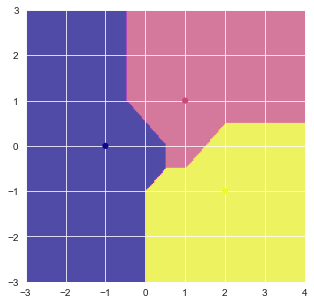

In [34]:
test_kNN(minx=-3, maxx=4, miny=-3, maxy=3, M=M, C=C, k=1, n=200, metric='cityblock', figsize=(5,5))

0

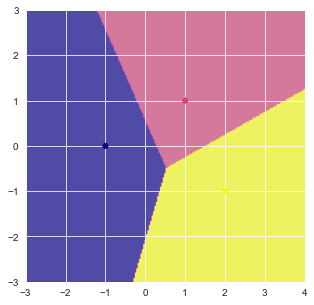

In [35]:
test_kNN(minx=-3, maxx=4, miny=-3, maxy=3, M=M, C=C, k=1, n=200, figsize=(5,5))

For producing such a plot, you can use function `imshow` from `matplotlib`.

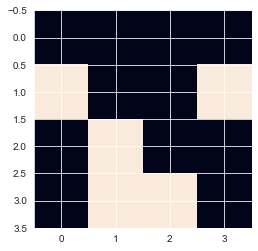

In [36]:
img= np.array([[0,0,0,0],
                [1,0,0,1],
                [0,1,0,0],
                [0,1,1,0]])
plt.imshow(img)

Note the ranges of the axes. Read the documentation for `imshow`. If we would like to have a picture with big "pixels" of width 1 with centers at (0,0),(1,0),(0,1) and (1,1), we can use the following.

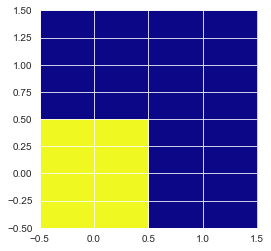

In [37]:
img = np.array([[0,0],
                [1,0]
               ])
plt.imshow(img, extent = (-0.5,1.5,-0.5,1.5),cmap=cm.plasma)

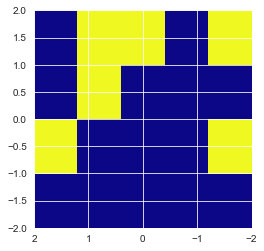

In [38]:
img= np.array([[0,0,0,0,0],
                [1,0,0,0,1],
                [0,1,0,0,0],
                [0,1,1,0,1]])
plt.imshow(img,extent=(2,-2,-2,2),origin='lower', cmap=cm.plasma)

Some sample calls of `test_kNN`:

Wrongly classified 0 vectors


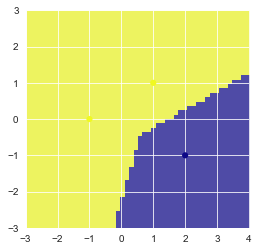

In [39]:
M = np.array([[-1, 0], [1, 1], [2, -1]])
C = np.array([1,1,0])
r = test_kNN(minx=-3, maxx=4, miny=-3, maxy=3, M=M, C=C, k=1, n=50)
print(f'Wrongly classified {r} vectors')

Wrongly classified 0 vectors


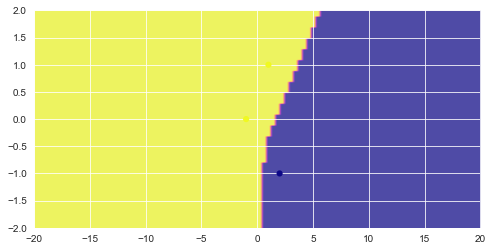

In [40]:
r = test_kNN(minx=-20, maxx=20, miny=-2, maxy=2, M=M, C=C, k=1, n=100, figsize=(8,4))
print(f'Wrongly classified {r} vectors')

Wrongly classified 0 vectors


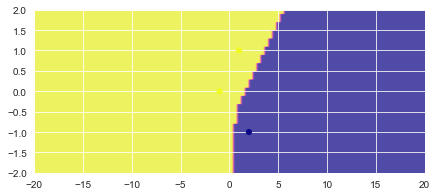

In [41]:
r = test_kNN(minx=-20, maxx=20, miny=-2, maxy=2, M=M, C=C, k=1, n=100, figsize=(7,3))
print(f'Wrongly classified {r} vectors')

**NOTE** The results of the charts above can seem a bit strange of counterintuitive at a first look.
Be careful, however, about the fact that the scale for the values along the y axis is different from the ones along the x axis.
This behavior could be modified by changing the 'aspect' field of plt.imshow from 'auto' to 'equal'. However, for very unbalanced charts (i.e. when the ranges of values are very different along the 2 axes), the result could be impossible to analyze.

## Testing k-NN Algorithm

Download the file `kNN_dataset.npz`, which you can find in moodle together with this assignment. When you read the using ```npzfile = np.load('kNN_dataset.npz')``` you can access arrays `M1`, `C1`, `M2`, `C2` as `npzfile['M1']`, `npzfile['C1']`, `npzfile['M2']` and `npzfile['C2']`, respectively.

**Task 3:** Using your function `test_kNN` produce visualizations (using suitable ranges for both coordinates) for the set of vectors `M1` classified into classes in `C1` for `K=1`, `K=3` and `K=10`. Plot the results and compare them with respect to the value of `K`. Will the visualizations be different when we compute the distance between vectors using the `cityblock` metric?

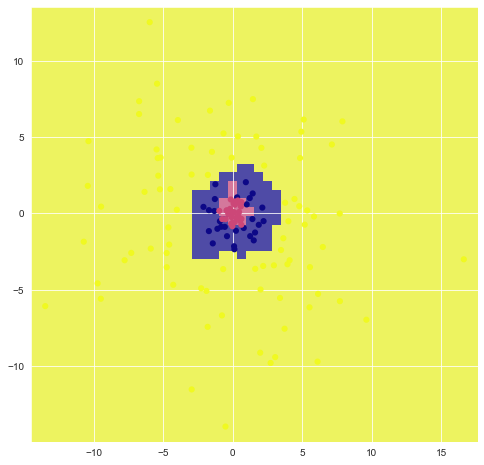

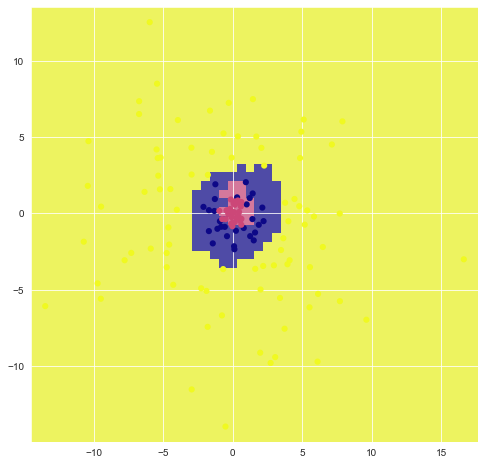

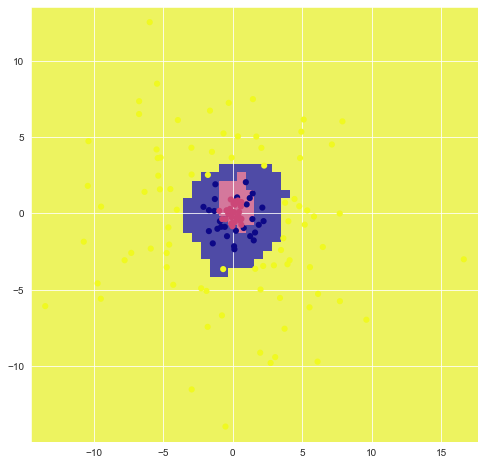

In [42]:
data = np.load('kNN_dataset.npz')

M1 = data['M1']
C1 = data['C1']
def get_min_max(matrix):
    """
    This functions gets a matrix and returns the minimum and maximum values for the x's and y's modified by 1
    (1 so that when plotting using those values as extent of imshow, the values are not on the exact border of the image)
    """
    c_min = np.amin(matrix, axis=0)
    minx = c_min[0] - 1
    miny = c_min[1] - 1

    c_max = np.amax(matrix, axis=0)
    maxx = c_max[0] + 1
    maxy = c_max[1] + 1

    return minx, maxx, miny, maxy

minx, maxx, miny, maxy = get_min_max(M1)

steps = 50

# Plotting the required figures for K=1,3,10
K = [1,3,10]
for k in K:
    test_kNN(minx, maxx, miny, maxy, M1, C1, k, steps, figsize=(8,8))

### Difference with Manhattan (cityblock) distance

The euclidean distance between 2 points $x_1,x_2$ in a d-dimensional space is defined as:
$$dist = \sqrt{\sum_{i=0}^d(x_{1i} - x_{2i})^2}$$

While the Manhattan distance is defined as:
$$dist = \sum_{i=0}^d|x_{1i} - x_{2i}|$$

Since the functions used to compute the distance are different, of course we would expect the visualization of the data to be different.

**Note:** the results will be different based on the number of pixels that you decide to have as size.

Let us see this in practice:

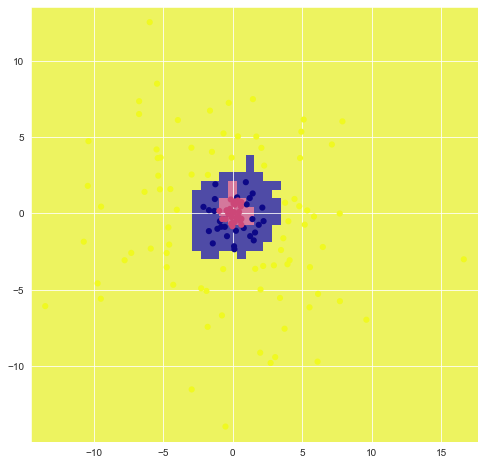

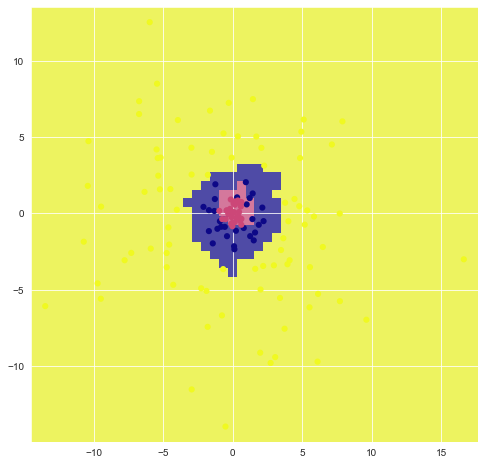

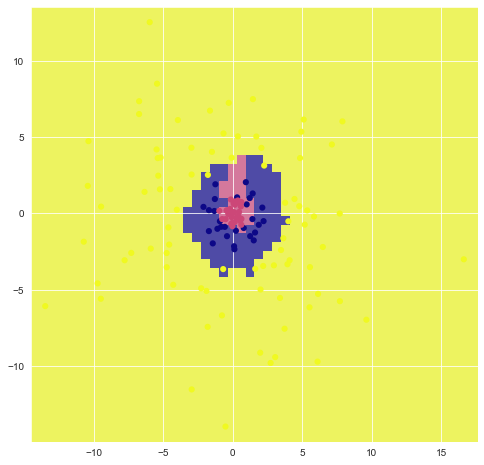

In [43]:
for k in K:
    test_kNN(minx, maxx, miny, maxy, M1, C1, k, steps, figsize=(8,8), metric='cityblock')

We can see that the representation is different, this difference is even more evident when looking at the red class (the one in the middle).

**Task 4:** Do the same as in Task 3 but for the array of vectors `M2` with classification `C2`. You may notice that the vectors in `M2` have a much bigger range of values in their second coordinate (the second column of `M2`) than in the first coordinate. Using `StandardScaler` from `sklearn.preprocessing`, normalize the values in the second coordinates of `M2` (only the second coordinate, not the first one!). Plot the corresponding visualizations with normalized `M2`. What is the difference in the visualization? Do you recommend any normalization before training and applying a k-NN classifier?

In [44]:
from sklearn.preprocessing import StandardScaler

# Obtaining the data
M2 = data['M2']
C2 = data['C2']

scaler = StandardScaler()
M2_new = M2.copy()
# Getting the values in the second coordinate, applying the transformation and then taking the transposed in order to re-convert it to a column vector (to perform correctly the assignment)
M2_new[:,1] = scaler.fit_transform(M2[:,1].reshape(-1,1)).T

We will now plot the points both before and after the normalization

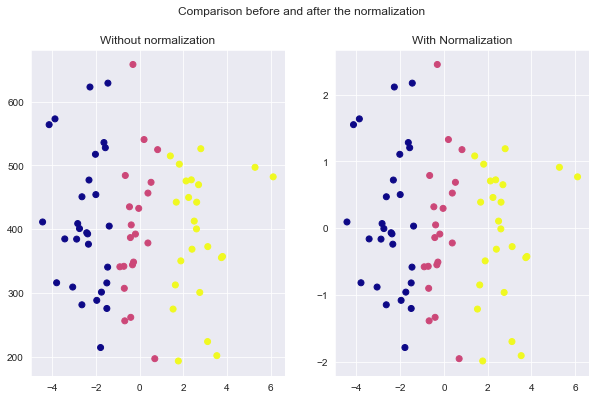

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
fig.suptitle('Comparison before and after the normalization')
ax1.set_title('Without normalization')
ax1.scatter(M2[:,0], M2[:,1], c=C2, cmap=cm.plasma)
ax2.set_title('With Normalization')
ax2.scatter(M2_new[:,0], M2_new[:,1], c=C2, cmap=cm.plasma)

We can see that the visualization of the data is just translated and rescaled, while the mutual position between the objects remains the same.
Apparently, using the normalization wouldn't seem bad since everything seems the same by looking at the plot.
However, we need to consider how the kNN classifier works.
The kNN classifier uses the **distance** between 2 points. When we're normalizing, we are transforming the data in such a way that the mean is 0 and the variance is 1 for *the feature that we normalize*. This basically will *remove any information about the offset* of the relative placement of the patterns along the normalized features.

This can be both positive and negative depending on the problem that we're considering:
- It's positive when our features have different ranges but what we care about is only the 'relative distance' of the samples from each other. The classification doesn't depend on the absolute distance and the examples of the same class are close to each other along the axis along which we normalize.
 For example, if we consider Age and Number of Pets, the 2 features should have the same weight and therefore the distance shouldn't be biased due to the larger range of Age with respect to the other feature.
- It's negative when the units of the features you have are meaningful and distance actually makes a difference.
 Consider for example Latitude and Longitude, when considering such a dataset, normalization would be bad because 2 points at the same longitude but very different latitude should be considered to be far apart by the kNN classifier. Normalization simply would get rid of this information making the 2 examples (wrongly) close to each other.
  Furthermore, if the classes are close to each other along one axis and we normalize along the other one, we may get rid of important information which can lead to wrong classification. (See task 5 for further explanation).

Once these observations have been done, we observe that the ranges of the 2 features are very different.
Along the x axis the range is around [-4,6] while along the y axis we have a range [200,700].
We see that the patterns belong to the same class when considering their distribution along the y axis, so they need to be considered as close to each other along that axis.
Normalization along the y axis shouldn't lead to any problem.
In my opinion normalization in this case is the best choice.

Let us see if our conclusions obtained before are correct or not by using our function test_kNN.
We will make a comparison before and after normalization

Before normalization there are 22 errors
After normalization there are 1 errors
The number of patterns in the dataset is 72


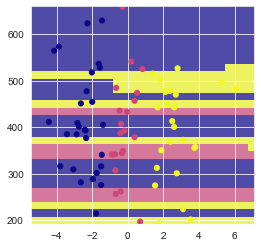

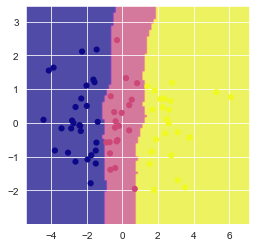

In [46]:
minx, maxx, miny, maxy = get_min_max(M2)
errors = test_kNN(minx, maxx, miny, maxy, M2, C2, 3, 30)
print(f'Before normalization there are {errors} errors')

minx, maxx, miny, maxy = get_min_max(M2_new)
errors = test_kNN(minx, maxx, miny, maxy, M2_new, C2, 3, 100)
print(f'After normalization there are {errors} errors')

print('The number of patterns in the dataset is', C2.shape[0])

We can easily see that for a simple 3-NN classifier without applying the normalization 22 errors were done out of 72 possible classifications.
Without normalization the error rate over the training set is 30% (very bad!).
After normalizing, this error gets scaled down to around 1%.

We can also look at a stronger classifier.
For example a 10-NN will give the following results:

Before normalization there are 30 errors
After normalization there are 0 errors
The number of patterns in the dataset is 72


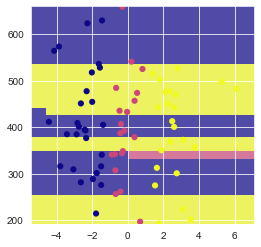

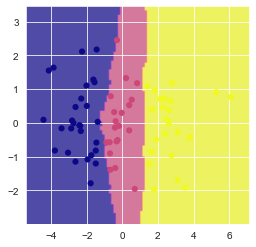

In [47]:
minx, maxx, miny, maxy = get_min_max(M2)
errors = test_kNN(minx, maxx, miny, maxy, M2, C2, 10, 30)
print(f'Before normalization there are {errors} errors')

minx, maxx, miny, maxy = get_min_max(M2_new)
errors = test_kNN(minx, maxx, miny, maxy, M2_new, C2, 10, 100)
print(f'After normalization there are {errors} errors')

print('The number of patterns in the dataset is', C2.shape[0])

Now the difference is even higher going from an error rate of 42% to 0% (over the training set).
It's important that the model is able to classify correctly the pattern in the training set before looking at the validation/test error. If this is not the case, in fact, the model is subject to underfitting.

Our initial assumptions, therefore, were correct and normalization in this case can definitely help us to achieve better results.

**Task 5 (optional):** (in case you lose some points in the previous tasks, your correct solution of Task 5 will add 1 point to your score the whole asignment): Show an example (using two-dimensional sample vectors and `test_kNN` function) in which normalizing before applying k-NN classifier produces worse result that without the normalization.

This can be achieved for example if we normalize along the y-axis when the patterns are close to each other alomng the y-axis.

Before normalization there are 0 errors

After normalization we get the following dataset:
[[-5.         -0.83631451]
 [ 0.         -1.29248607]
 [ 5.         -0.83631451]
 [-2.          0.9883717 ]
 [ 0.          0.9883717 ]
 [ 2.          0.9883717 ]]

After normalization there are 1 errors


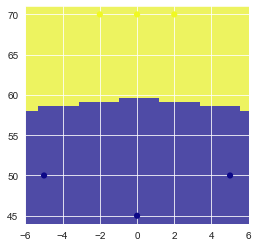

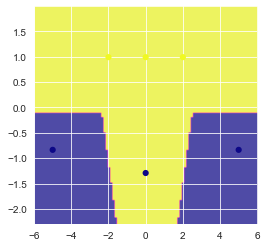

In [48]:
dataset = np.array([[-5,50],[0,45],[5,50],[-2,70],[0,70],[2,70]])
dataset = dataset.astype(float)
classes = np.array([0,0,0,1,1,1])

minx, maxx, miny, maxy = get_min_max(dataset)
errors = test_kNN(minx,maxx,miny,maxy,dataset,classes,k=3,n=50)
print(f'Before normalization there are {errors} errors')

scaler = StandardScaler()
dataset_new = dataset.copy()
# Getting the values in the second coordinate, applying the transormation and then taking the transposed in order to re-convert it to a column vector (to perform correctly the assignment)
dataset_new[:,1] = scaler.fit_transform(dataset[:,1].reshape(-1,1)).T

print(f'\nAfter normalization we get the following dataset:\n{dataset_new}\n')
minx, maxx, miny, maxy = get_min_max(dataset_new)
errors = test_kNN(minx,maxx,miny,maxy,dataset_new,classes,k=3,n=100)
print(f'After normalization there are {errors} errors')

We can see in this case that after normalizing the data, the error rate raised from 0% to 16%.
In this case, our patterns were close along the x axis while distant along the y axis.
The normalization along the y axis removes this information and gives to x and y the same weight, which is something we don't want.
As a conclusion, we can say that we must be careful about how the data are distributed in the space and what's the relationship between them before normalizing.

Submit your solution as a Jupyter notebook. If you will submit more files, save them as a Zip-archive.